In [3]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
#import libraries
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

In [156]:
df=pd.read_excel("Sample Data1.xlsx")
#df.fillna(0,inplace=True)

In [8]:
#Top Countries
temp=df["Country"].value_counts().to_frame()
temp=temp.head(6)
popCountries={"United States":1116,"United Kingdom":347,"India":203,"Spain":132,"Canada":132}
temp


,Country
United States,1116
United Kingdom,347
India,203
Spain,132
Canada,132
France,72


In [9]:
#Top cities
temp=df["City"].value_counts().to_frame()
temp=temp.head(6)
popCity={"London":89,"Paris":31,"Chicago":28,"Boston":23,"San Francisco":20}
temp

,City
London,89
Paris,31
Chicago,28
Boston,23
San Francisco,20
Sydney,20


In [13]:
from datetime import datetime


In [14]:
temp=pd.read_excel("Sample Data1.xlsx")
temp.fillna(0,inplace=True)
temp=temp[temp["Retweets"]!=0]
temp
import calendar
time=[]
week_day=[]
for i in temp['CreatedTime']:
    date_time_obj = i#datetime.strptime(i,'%Y-%m-%d %H:%M:%S')
    week_day.append(calendar.day_name[date_time_obj.weekday()])
    time.append(date_time_obj.time())
    
temp['time']=time
temp['week_day']=week_day

In [15]:
temp.groupby("week_day").mean()

,Sender Followers Count,Retweets
week_day,,
Friday,140571.375000,5.675000
Monday,62742.333333,2.456140
Sunday,50261.222222,3.222222
Thursday,114169.446429,4.803571
Tuesday,76876.895833,8.500000
Wednesday,74862.693548,3.661290


In [16]:
daypart=[]
for i in temp.time:
    if (i.hour)>=5 and i.hour<8:
        daypart.append('Early Morning')
    elif i.hour>=8 and i.hour<11:
        daypart.append('Morning')
    elif i.hour>=11 and i.hour<12:
        daypart.append('Late Morning')
    elif i.hour>=12 and i.hour<15:
        daypart.append('Early Afternoon')
    elif i.hour>=15 and i.hour<17:
        daypart.append('Late Afternoon')
    elif i.hour>=17 and i.hour<19:
        daypart.append('Early Evening')
    elif i.hour>=19 and i.hour<21:
        daypart.append('Late Evening')
    elif i.hour>=21 or i.hour<5:
        daypart.append('Night')
temp['day_part']=daypart

In [17]:
temp.groupby("day_part").mean()

,Sender Followers Count,Retweets
day_part,,
Early Afternoon,58366.755556,2.688889
Early Evening,51966.594595,12.297297
Early Morning,144968.657895,3.342105
Late Afternoon,85249.000000,4.032258
Late Evening,53550.576923,2.884615
Late Morning,95405.687500,2.187500
Morning,115818.060606,5.818182
Night,107282.347826,3.695652


In [ ]:
def spli(a):
    try:
        return a.split()
    except:
        return 0

In [157]:
ab=df["Message"][:200]

In [158]:
all_sentences = []

for word in ab:
    all_sentences.append(word)

#all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences: 
    try:
        words = line.split()
        for w in words: 
           lines.append(w)
    except:
        continue


#print(lines)

In [159]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [160]:
len(lines)

42464

In [161]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
#stem

In [162]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

#stem2

In [163]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False

In [164]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 1148,
          2: 642,
          3: 438,
          4: 210,
          5: 159,
          6: 126,
          7: 91,
          8: 82,
          9: 71,
          10: 63,
          11: 39,
          12: 47,
          13: 28,
          14: 29,
          15: 35,
          16: 36,
          17: 23,
          18: 16,
          19: 20,
          20: 17,
          21: 19,
          22: 7,
          23: 14,
          24: 13,
          25: 8,
          26: 12,
          27: 17,
          28: 10,
          29: 9,
          30: 4,
          31: 8,
          32: 3,
          33: 5,
          34: 4,
          35: 4,
          36: 3,
          37: 6,
          38: 8,
          39: 6,
          40: 4,
          41: 6,
          42: 2,
          43: 1,
          44: 2,
          45: 3,
          46: 3,
          47: 3,
          48: 4,
          49: 2,
          51: 1,
          52: 3,
          53: 4,
          54: 4,
          55: 3,
          56: 2,
          57: 1,
          58: 1,
       

In [165]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


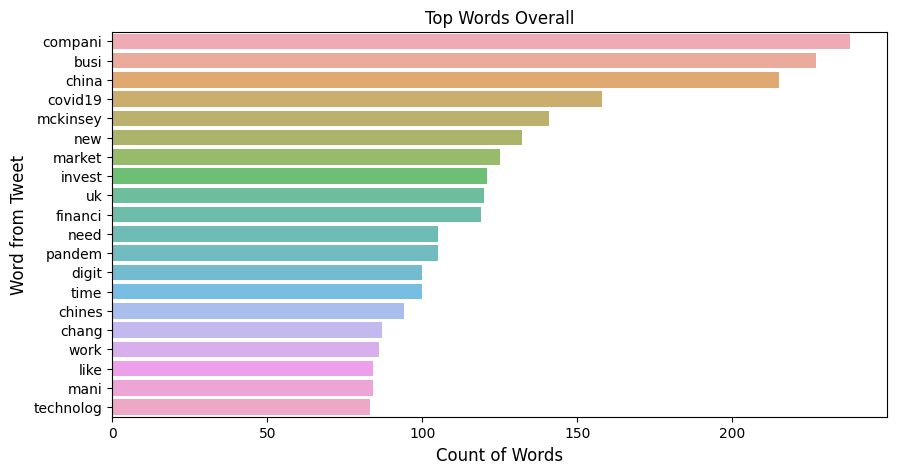

In [166]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [167]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [168]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [169]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


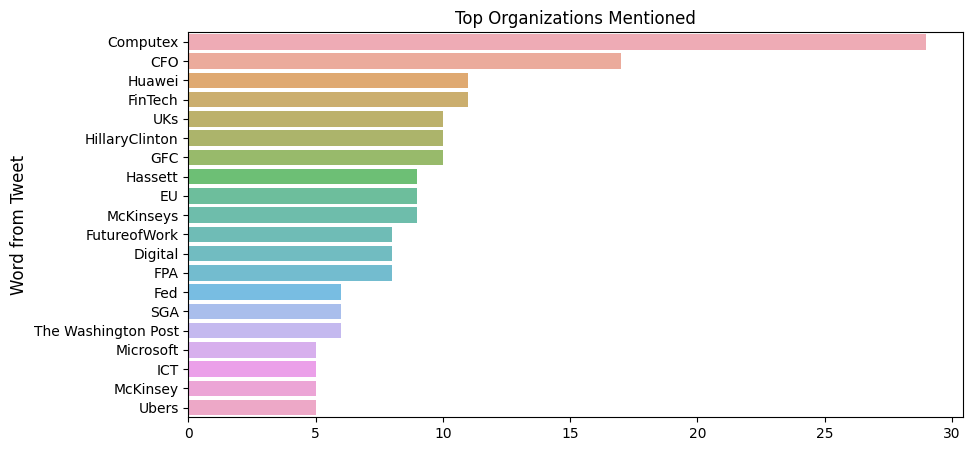

<Figure size 640x480 with 0 Axes>

In [171]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
#plt.xlabel('Count of Words', fontsize=12)
plt.show()
plt.savefig("hii.png")

In [172]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


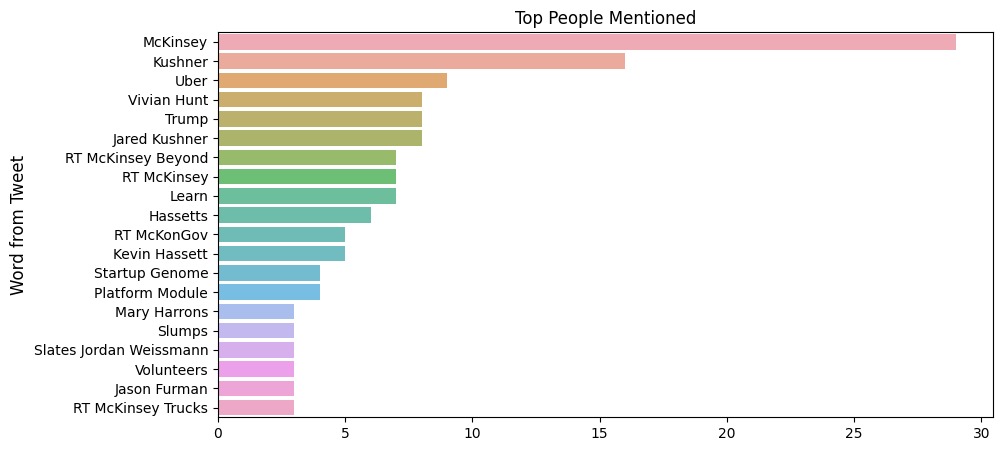

<Figure size 640x480 with 0 Axes>

In [174]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
#plt.xlabel('Count of Words', fontsize=12)
plt.show()
plt.savefig("People.png")